

---

## Evaluation Metric: AUC
AUC (Area Under the ROC Curve) tells us how well the model separates the classes.
- AUC = 1 → perfect model
- AUC = 0.5 → random guessing
We use this instead of accuracy because the dataset is **imbalanced**.

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.0 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import roc_auc_score
import optuna

In [ ]:
# Optuna tuning function
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    clf.fit(X_train_scaled, y_train)
    pred = clf.predict_proba(X_test_scaled)[:, 1]
    return roc_auc_score(y_test, pred)

In [ ]:
# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2025-05-15 14:35:27,691] A new study created in memory with name: no-name-f8736141-23bb-4d87-9dd0-c0b2b15bbb57
[I 2025-05-15 14:35:27,701] Trial 0 finished with value: 0.7984773662551441 and parameters: {'max_depth': 8, 'min_samples_split': 20}. Best is trial 0 with value: 0.7984773662551441.
[I 2025-05-15 14:35:27,710] Trial 1 finished with value: 0.7558436213991769 and parameters: {'max_depth': 8, 'min_samples_split': 3}. Best is trial 0 with value: 0.7984773662551441.
[I 2025-05-15 14:35:27,716] Trial 2 finished with value: 0.7374485596707819 and parameters: {'max_depth': 2, 'min_samples_split': 13}. Best is trial 0 with value: 0.7984773662551441.
[I 2025-05-15 14:35:27,723] Trial 3 finished with value: 0.7952263374485596 and parameters: {'max_depth': 3, 'min_samples_split': 14}. Best is trial 0 with value: 0.7984773662551441.
[I 2025-05-15 14:35:27,731] Trial 4 finished with value: 0.7952263374485596 and parameters: {'max_depth': 3, 'min_samples_split': 14}. Best is trial 0 with

In [ ]:
# Best result
best_params = study.best_params
print("Best Decision Tree Parameters from Optuna:", best_params)

Best Decision Tree Parameters from Optuna: {'max_depth': 4, 'min_samples_split': 7}


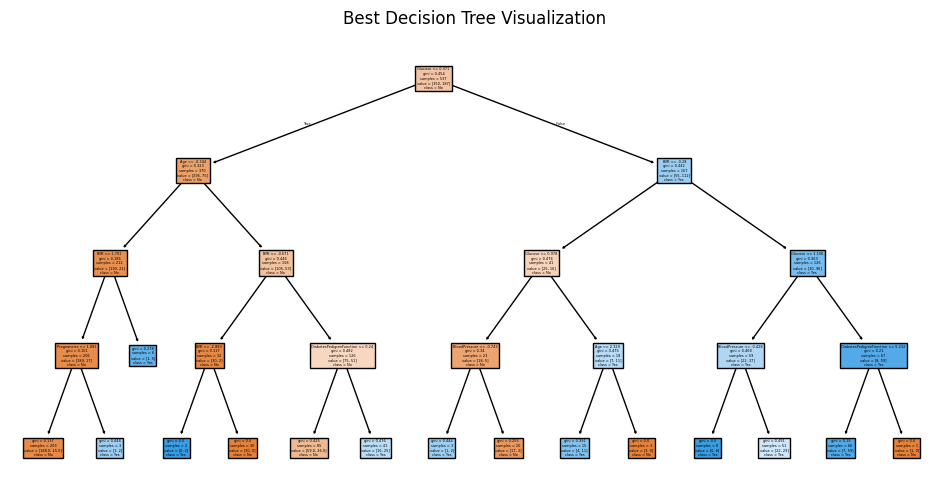

Best AUC: 0.8023045267489712


In [ ]:
# Visualize best tree
clf_best = DecisionTreeClassifier(**best_params)
clf_best.fit(X_train_scaled, y_train)
plt.figure(figsize=(12, 6))
plot_tree(clf_best, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Best Decision Tree Visualization")
plt.show()

print("Best AUC:", roc_auc_score(y_test, clf_best.predict_proba(X_test_scaled)[:, 1]))

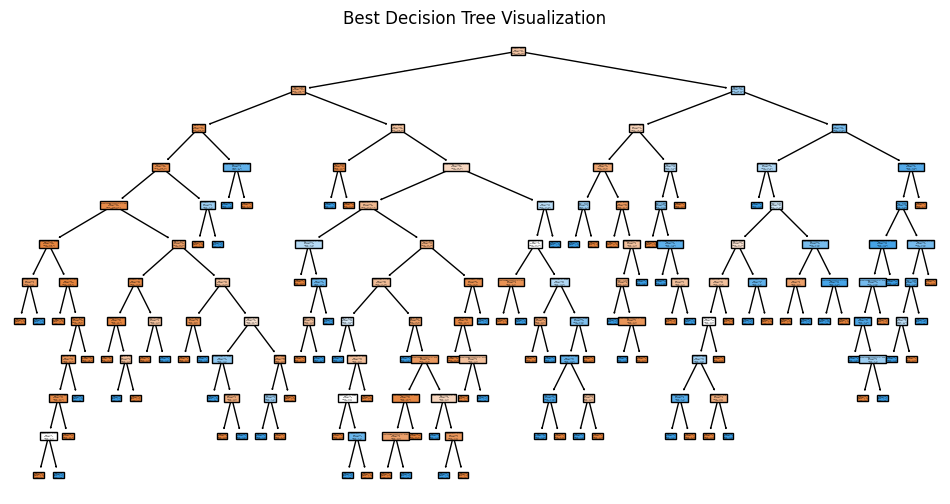

Overfit AUC: 0.7206172839506172


In [ ]:
# Overfitted case
clf_overfit = DecisionTreeClassifier(max_depth=15)
clf_overfit.fit(X_train_scaled, y_train)
plt.figure(figsize=(12, 6))
plot_tree(clf_overfit, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Best Decision Tree Visualization")
plt.show()

print("Overfit AUC:", roc_auc_score(y_test, clf_overfit.predict_proba(X_test_scaled)[:, 1]))

In [ ]:
print("✅ Best AUC:", roc_auc_score(y_test, clf_best.predict_proba(X_test_scaled)[:, 1]))
print("⚠️ Overfit AUC:", roc_auc_score(y_test, clf_overfit.predict_proba(X_test_scaled)[:, 1]))

✅ Best AUC: 0.8023045267489712
⚠️ Overfit AUC: 0.7206172839506172


## Summary

Even with the same model type (Decision Tree), tuning matters:
- **Best AUC:** the tuned model found by Optuna generalizes well
- **Overfit AUC:** deeper tree fits too much and performs worse on test data

This shows the importance of:
- parameter tuning (e.g., via Optuna)
- avoiding overfitting
- choosing evaluation metrics that reflect the true performance